In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def graph(filename, title):
    df = pd.read_csv(filename, index_col='size')
    plt.figure(figsize=(10,7))
    plt.plot(df)
    plt.legend(['Koeficienty', 'Jednoduchy', 'Karatsuba'])
    plt.xlabel("Velikost vstupu")
    plt.ylabel("Cas vypoctu [s]")
    plt.title(title)

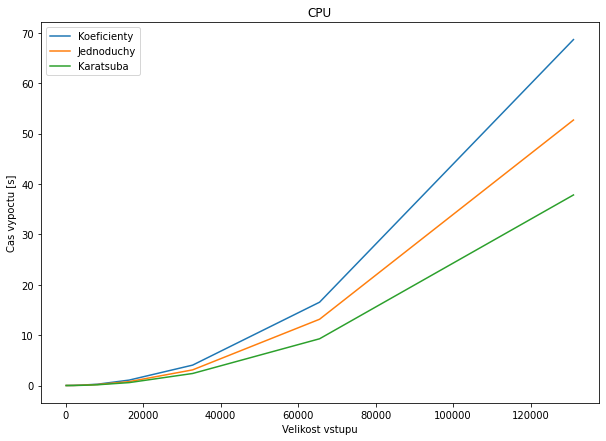

In [3]:
graph("data/cpu.csv", "CPU")

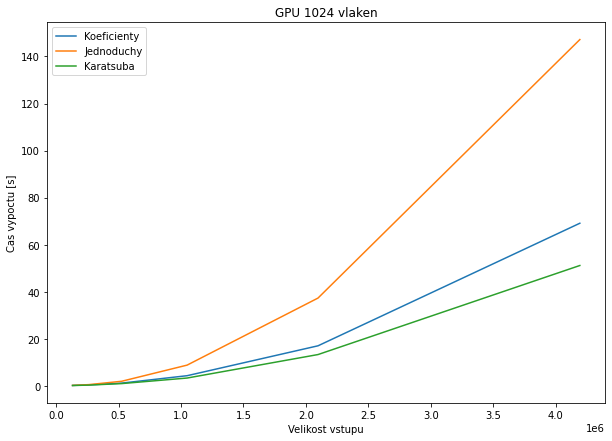

In [17]:
graph('data/gpu1024.csv', "GPU 1024 vlaken")

In [5]:
#graph('data/gpu128.csv', "GPU 512 threads")

In [6]:
#graph('data/gpu256.csv', "GPU 256 threads")

In [7]:
#graph('data/gpu512.csv', "GPU 128 threads")

In [8]:
#graph('data/gpu64.csv', "GPU 64 threads")

In [9]:
cpu = pd.read_csv('data/cpu.csv', index_col='size')
df64 = pd.read_csv('data/gpu64.csv', index_col='size')
df128 = pd.read_csv('data/gpu128.csv', index_col='size')
df256 = pd.read_csv('data/gpu256.csv', index_col='size')
df512 = pd.read_csv('data/gpu512.csv', index_col='size')
df1024 = pd.read_csv('data/gpu1024.csv', index_col='size')


<AxesSubplot:title={'center':'CPU proti GPU (loglog)'}, xlabel='size', ylabel='Cas vypoctu [s]'>

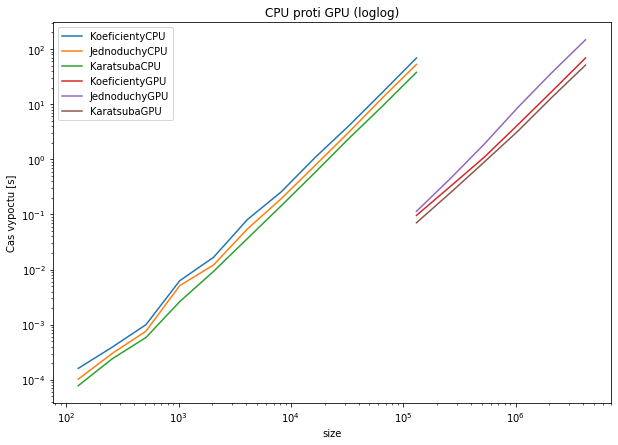

In [16]:
df = cpu.rename(columns={'Koeficienty':'KoeficientyCPU', 'Jednoduchy':'JednoduchyCPU', 'Karatsuba':'KaratsubaCPU'})
df = df.join(df1024, how='outer').rename(columns={'Koeficienty':'KoeficientyGPU', 'Jednoduchy':'JednoduchyGPU', 'Karatsuba':'KaratsubaGPU'})
df.plot(ylabel='Cas vypoctu [s]',figsize=(10,7), title='CPU proti GPU (loglog)', loglog=True)

In [11]:
df = pd.DataFrame(df64['Jednoduchy']).rename(columns={'Jednoduchy':64, 'size': 'Velikost vstupu'})
df[128]=df128['Jednoduchy']
df[256]=df256['Jednoduchy']
df[512]=df512['Jednoduchy']
df[1024]=df1024['Jednoduchy']

<AxesSubplot:title={'center':'Jednoduchy algoritmus pro ruzne pocty vlaken bloku (loglog)'}, xlabel='size', ylabel='Cas vypoctu [s]'>

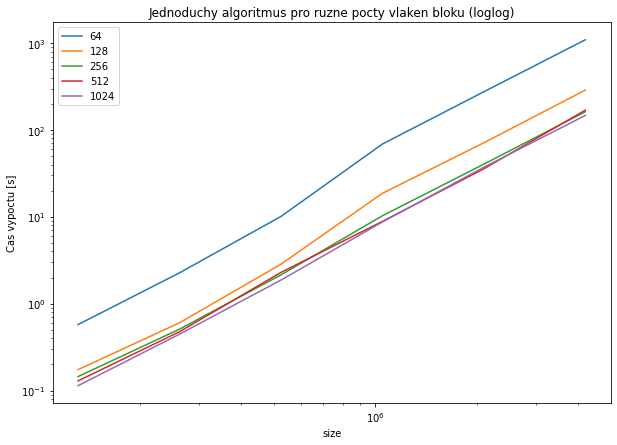

In [12]:
df.plot(ylabel='Cas vypoctu [s]',figsize=(10,7), title='Jednoduchy algoritmus pro ruzne pocty vlaken bloku (loglog)', loglog=True)